# CNN做mnist手寫數字辨識

## Import

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, add, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adadelta, adam
from keras.utils import np_utils
from ipywidgets import interact_manual
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


## 讀入mnist數據

In [2]:
# read mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],
                          x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],
                        x_test.shape[2], 1)

print(x_train.shape)

# transform string type into int type [0,9]
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

(60000, 28, 28)
(60000, 28, 28, 1)


## 架設CNN

In [3]:
model = Sequential()

model.add(
    Conv2D(
        input_shape=(28,28,1),
        data_format = 'channels_last',
        filters = 32,
        kernel_size = (7,7), 
        strides = 1,
        padding = 'same',
        activation = 'relu',
        )
    )

model.add(
    MaxPooling2D(
        pool_size = 2,
        strides = 2,
        padding = 'valid',
        data_format = 'channels_last'
        )
    )

model.add(
    Conv2D(
        data_format = 'channels_last',
        filters = 16,
        kernel_size = (5,5), 
        strides = 1,
        padding = 'same',
        activation = 'relu',
        )
    )

model.add(
    MaxPooling2D(
        pool_size = 2,
        strides = 2,
        padding = 'valid',
        data_format = 'channels_last'
        )
    )

model.add(
    Conv2D(
        data_format = 'channels_last',
        filters = 8,
        kernel_size = (3,3), 
        strides = 1,
        padding = 'same',
        activation = 'relu',
        )
    )

model.add(
    MaxPooling2D(
        pool_size = 2,
        strides = 2,
        padding = 'valid',
        data_format = 'channels_last'
        )
    )


model.add(
    Flatten(
        data_format = 'channels_last'
        )
    )

model.add(
    Dense(100, activation='relu')
    )

model.add(
    Dense(50, activation = 'relu')
    )

model.add(
    Dense(20, activation = 'relu')
    )

model.add(
    Dense(10, activation = 'softmax')
    )

model.summary()


model.compile(loss = 'categorical_crossentropy',
              optimizer = adam(),
              metrics = ['acc']
              )
        

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        12816     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 8)           0         
_________________________________________________________________
flat

In [4]:
early_stopping = EarlyStopping(monitor = 'val_acc', patience = 5,
                               verbose = 2)

model_epo50 = model.fit(x_train, y_train, batch_size = 256,
                        epochs = 500, validation_data = (x_test, y_test),
                        callbacks = [early_stopping]
                        )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 98s 2ms/step - loss: 0.5174 - acc: 0.8389 - val_loss: 0.1549 - val_acc: 0.9556
Epoch 2/500
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1232 - acc: 0.9626 - val_loss: 0.0823 - val_acc: 0.9730
Epoch 3/500
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0812 - acc: 0.9755 - val_loss: 0.0651 - val_acc: 0.9801
Epoch 4/500
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0617 - acc: 0.9814 - val_loss: 0.0599 - val_acc: 0.9796
Epoch 5/500
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0524 - acc: 0.9847 - val_loss: 0.0577 - val_acc: 0.9823
Epoch 6/500
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0501 - acc: 0.9845 - val_loss: 0.0730 - val_acc: 0.9766
Epoch 7/500
60000/60000 [==============================] - 105s 2ms/step -

## 畫出training data的historical accuracy

Text(0, 0.5, 'accuracy')

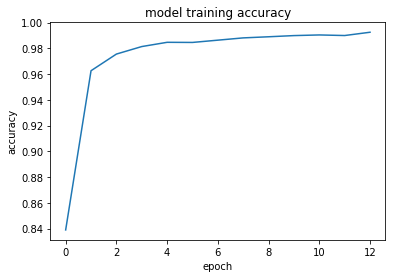

In [5]:
plt.plot(model_epo50.history['acc'])
plt.title('model training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

## 計算testing data準確率
|accuracy|
---|---|---|
| training data | testing data |
---|---|---|
accuracy | 99.37% | 98.53% |
loss | 0.0195 | 0.0514 |

In [6]:
train_score = model.evaluate(x_train, y_train, batch_size=128)
test_score = model.evaluate(x_test, y_test, batch_size=128)
print('train data loss: ',train_score[0])
print('training data accuracy: ',train_score[1])
print('testing data loss: ',test_score[0])
print('testing data accuracy: ',test_score[1])

10000/10000 [==============================] - 6s 582us/step
train data loss:  0.019507681948978766
training data accuracy:  0.9937166666348776
testing data loss:  0.05142526197191328
testing data accuracy:  0.9853
